In [ ]:
# source: https://github.com/Raven-SL/ru-pnames-list/tree/master/lists

In [2]:
from pathlib import Path
import torch
import seaborn as sns

In [3]:
words = Path("male_names_rus.txt").read_text().lower().splitlines()
words[:10]

['аарон',
 'аба',
 'аббас',
 'абд аль-узза',
 'абдуллах',
 'абид',
 'аботур',
 'аввакум',
 'август',
 'авдей']

In [4]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
sorted(b.items(), key=lambda kv: kv[1], reverse=True)[:10]

[(('н', '<E>'), 140),
 (('а', 'н'), 115),
 (('<S>', 'а'), 113),
 (('й', '<E>'), 107),
 (('а', 'р'), 83),
 (('и', 'й'), 77),
 (('р', 'и'), 76),
 (('р', '<E>'), 69),
 (('о', 'н'), 64),
 (('л', 'а'), 59)]

In [8]:
stop_symbols = {" ", "-"}

In [9]:
chars = sorted(list(set(''.join(words)) - stop_symbols))  # абвгд...эюя
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}
itos

{1: 'а',
 2: 'б',
 3: 'в',
 4: 'г',
 5: 'д',
 6: 'е',
 7: 'ж',
 8: 'з',
 9: 'и',
 10: 'й',
 11: 'к',
 12: 'л',
 13: 'м',
 14: 'н',
 15: 'о',
 16: 'п',
 17: 'р',
 18: 'с',
 19: 'т',
 20: 'у',
 21: 'ф',
 22: 'х',
 23: 'ц',
 24: 'ч',
 25: 'ш',
 26: 'ы',
 27: 'ь',
 28: 'э',
 29: 'ю',
 30: 'я',
 31: 'ё',
 0: '.'}

In [6]:
letters_count = len(chars)
N = torch.zeros((letters_count + 1, letters_count + 1), dtype=torch.int32)

In [10]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        if ch1 in stop_symbols or ch2 in stop_symbols:
            continue
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
    

<Axes: >

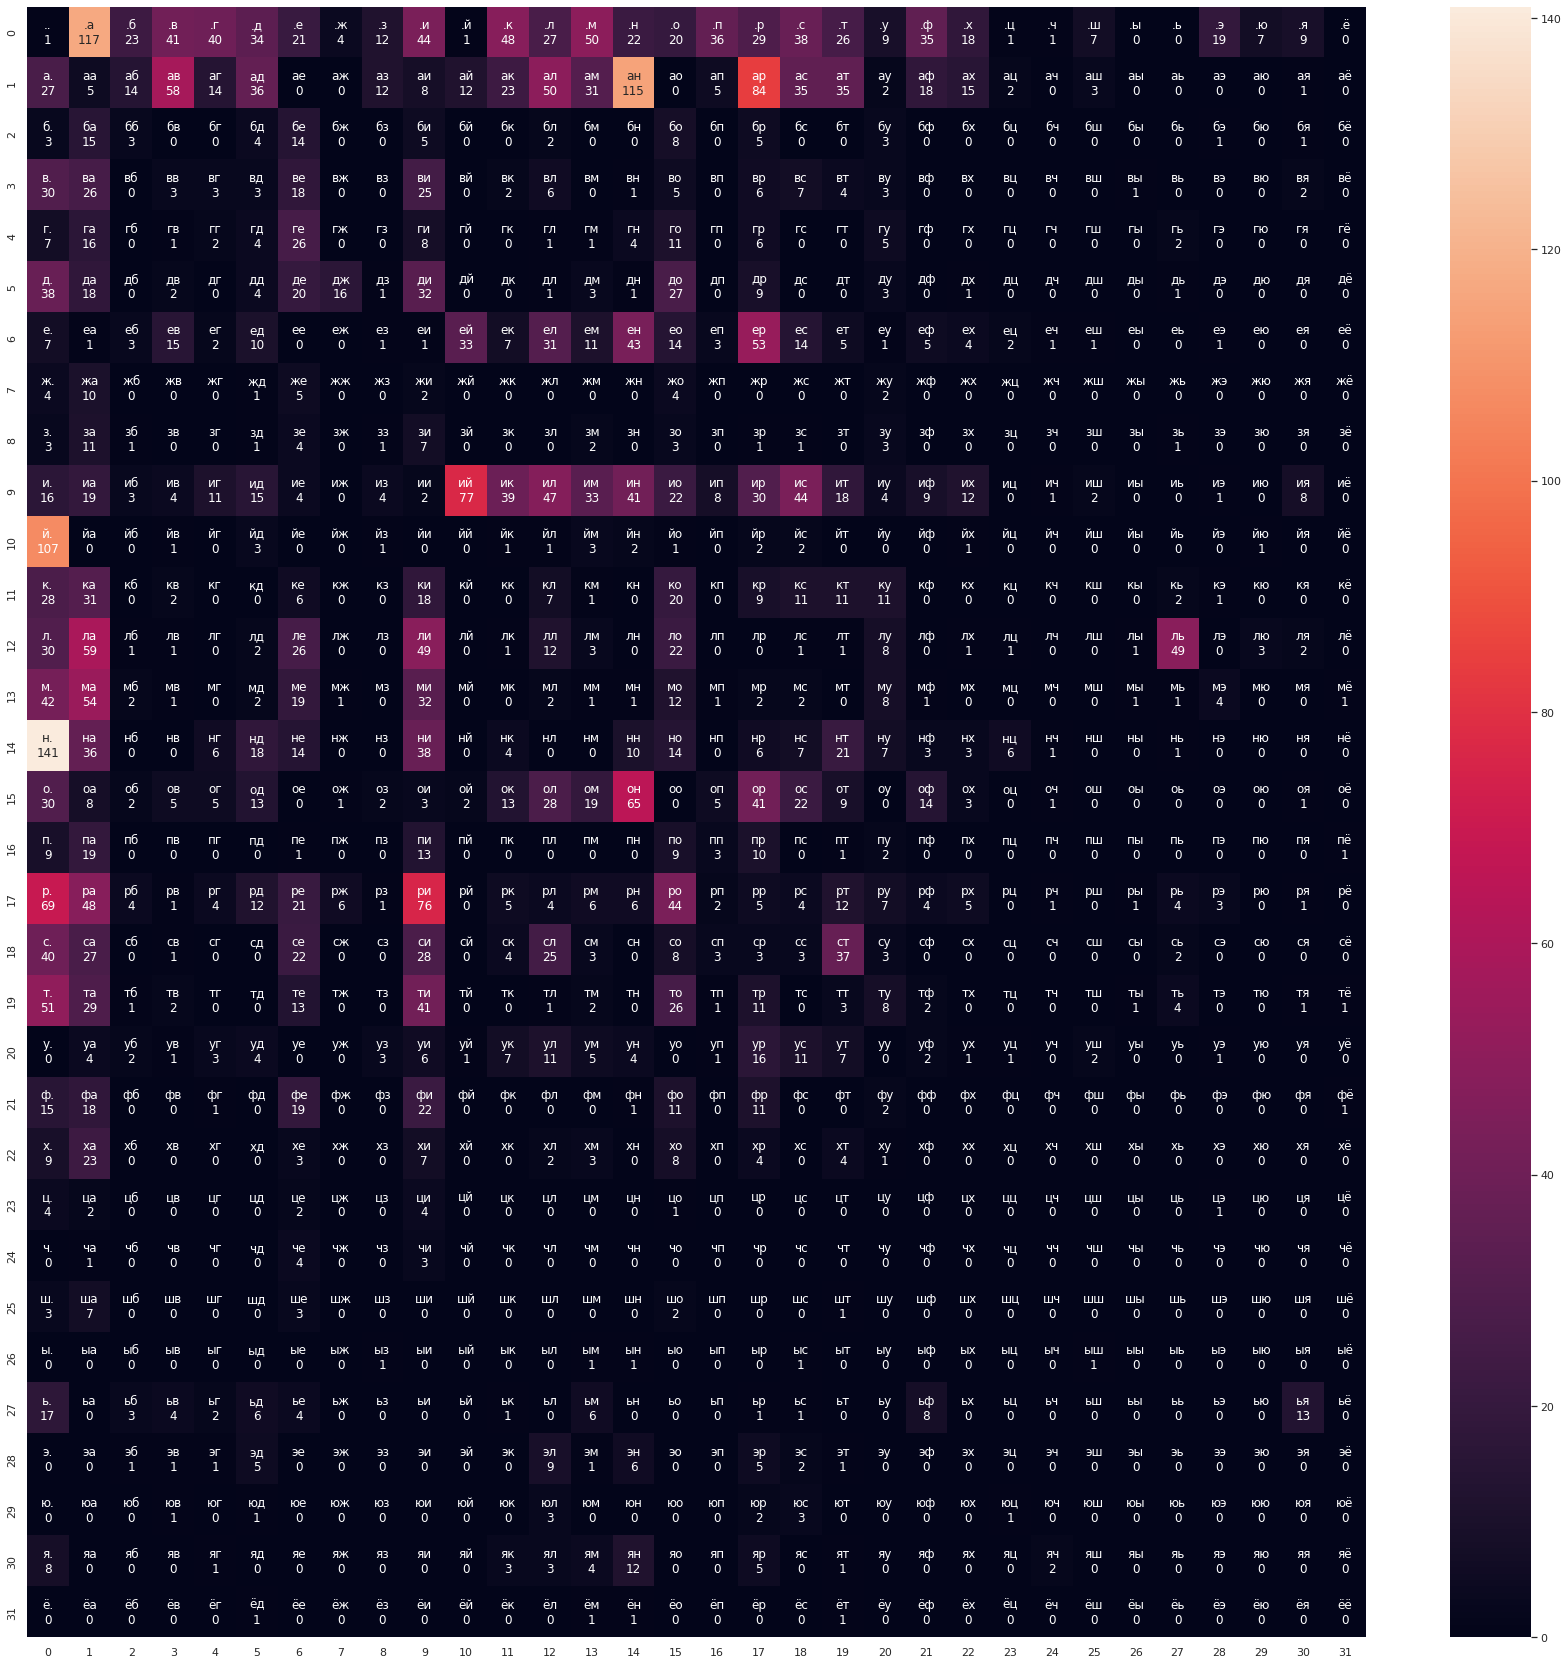

In [24]:
sns.set(rc={'figure.figsize':(30, 30)})
labels = []
for i in range(letters_count + 1):
    labels.append([])
    for j in range(letters_count + 1):
        chstr = itos[i] + itos[j]
        labels[i].append(chstr + "\n" + str(N[i, j].item()))
sns.heatmap(N, annot=labels, fmt="")

In [25]:
P = (N + 1).float()
P /= P.sum(1, keepdims=True)
P

tensor([[0.0026, 0.1528, 0.0311,  ..., 0.0104, 0.0130, 0.0013],
        [0.0440, 0.0094, 0.0235,  ..., 0.0016, 0.0031, 0.0016],
        [0.0417, 0.1667, 0.0417,  ..., 0.0104, 0.0208, 0.0104],
        ...,
        [0.0233, 0.0233, 0.0233,  ..., 0.0233, 0.0233, 0.0233],
        [0.1268, 0.0141, 0.0141,  ..., 0.0141, 0.0141, 0.0141],
        [0.0278, 0.0278, 0.0278,  ..., 0.0278, 0.0278, 0.0278]])

In [30]:
g = torch.Generator().manual_seed(239)
for i in range(5):
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

дорусталонф.
пц.
фиялоль.
е.
мадавлк.
